In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc('font',family='Malgun Gothic')

In [ ]:




gyeongnam1=pd.read_csv('/content/drive/Shareddrives/2021 CJ 대한통운 공모전/data/이커머스 최종 data/gyeongnam_regression_수화인포함.csv')
kyonggi1=pd.read_csv('/content/drive/Shareddrives/2021 CJ 대한통운 공모전/data/이커머스 최종 data/kyonggi_regression_수화인포함.csv')

In [ ]:




kyonggi1

,날짜,주문시간,"수화인주소1,2",isHoliday,isAnniversary,isHoliday_yest,incDec,요일,품목코드,index,강수량,최고기온,최저기온,평균기온,물량,품목금액
0,2021-03-01,밤,경기도 고양시,Y,N,N,160,월,4,7,67.5,9.0,0.5,4.7,7,30857.142857
1,2021-03-01,밤,경기도 고양시,Y,N,N,160,월,5,4,67.5,9.0,0.5,4.7,4,56675.000000
2,2021-03-01,밤,경기도 부천시,Y,N,N,160,월,4,1,67.5,9.0,0.5,4.7,1,74900.000000
3,2021-03-01,밤,경기도 성남시,Y,N,N,160,월,2,1,70.7,8.1,0.5,5.0,1,9900.000000
4,2021-03-01,밤,경기도 성남시,Y,N,N,160,월,4,15,70.7,8.1,0.5,5.0,15,12599.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22187,2021-06-30,점심,경기도 화성시,N,N,N,240,수,2,6,0.0,28.9,20.2,24.0,6,17100.000000
22188,2021-06-30,점심,경기도 화성시,N,N,N,240,수,3,4,0.0,28.9,20.2,24.0,4,56300.000000
22189,2021-06-30,점심,경기도 화성시,N,N,N,240,수,4,9,0.0,28.9,20.2,24.0,9,47122.222222
22190,2021-06-30,점심,경기도 화성시,N,N,N,240,수,5,9,0.0,28.9,20.2,24.0,9,60833.333333


# **3. regression**

In [ ]:
#결손치 파악하기

kyonggi1.isnull().sum()


gyeongnam1.isnull().sum()

날짜                0
주문시간              0
수화인주소1,2          0
isHoliday         0
isAnniversary     0
isHoliday_yest    0
incDec            0
요일                0
품목코드              0
index             0
강수량               0
최고기온              0
최저기온              0
평균기온              0
물량                0
품목금액              0
dtype: int64

In [ ]:
kyonggi1=kyonggi1.drop(columns=['날짜'])


In [ ]:
gyeongnam1=gyeongnam1.drop(columns=['날짜'])

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


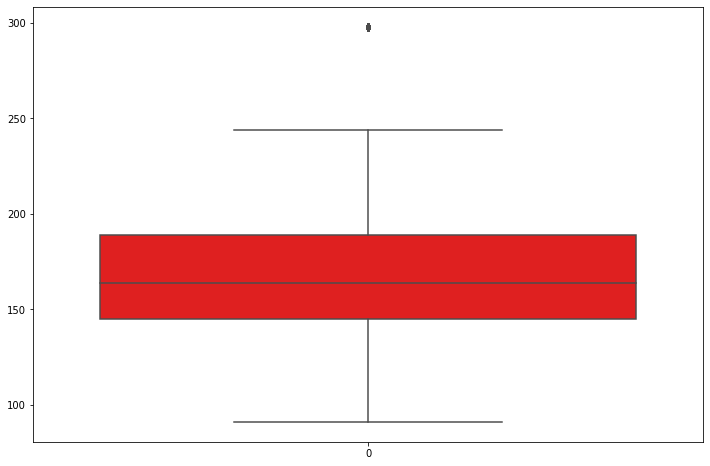

In [ ]:
#이상치 파악하기
#incDec, 강수량,최고기온, 최저기온,평균기온, 품목금액
plt.figure(figsize=(12,8))
sns.boxplot(data=kyonggi1['incDec'],color='red')
plt.show()

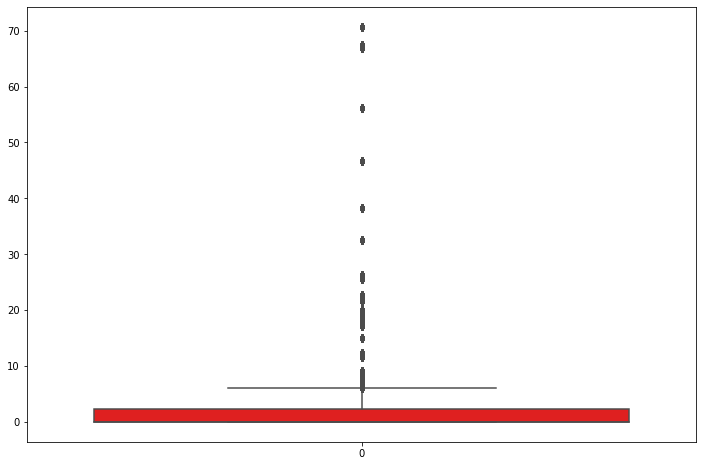

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=kyonggi1['강수량'],color='red')
plt.show()

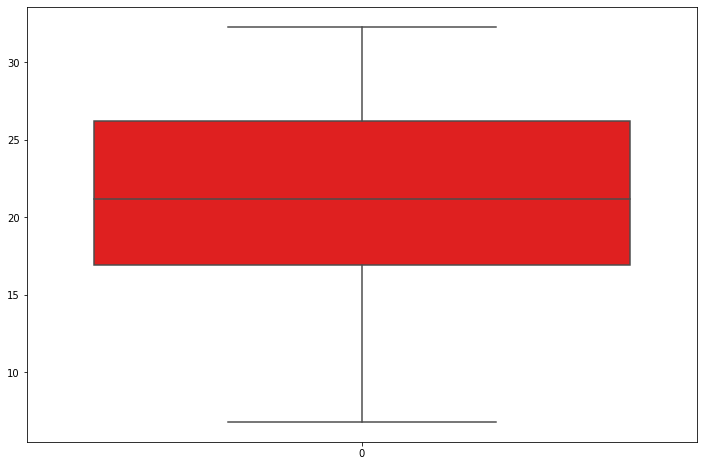

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=kyonggi1['최고기온'],color='red')
plt.show()

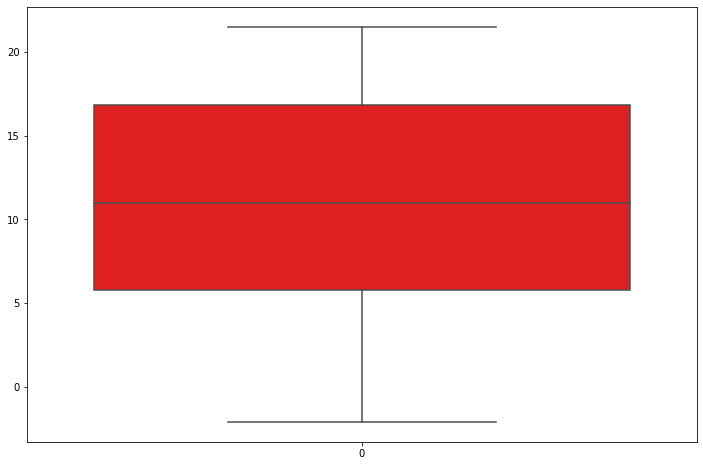

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=kyonggi1['최저기온'],color='red')
plt.show()

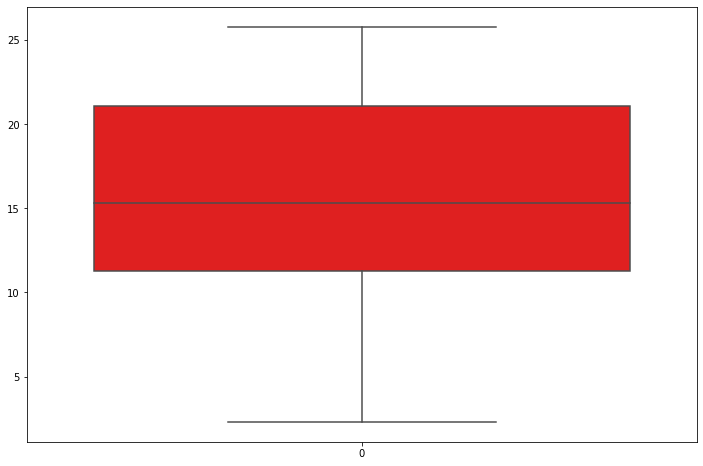

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=kyonggi1['평균기온'],color='red')
plt.show()

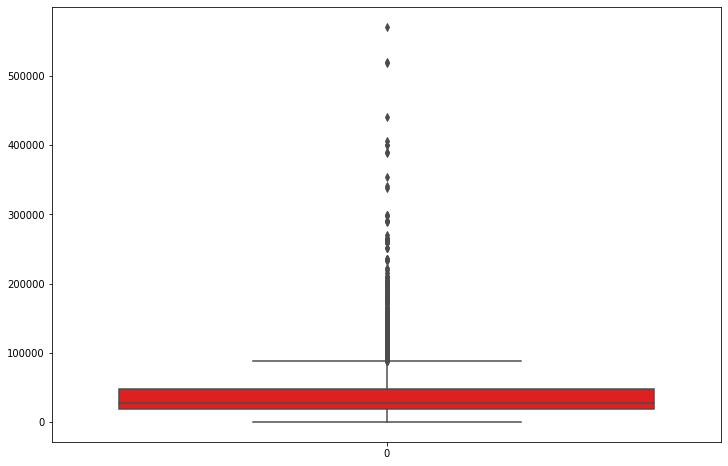

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=kyonggi1['품목금액'],color='red')
plt.show()

In [ ]:
# 이상치 존재 파아가

In [ ]:
#수행ok
quartiles=np.percentile(kyonggi1['incDec'],[25,50,75])
mu=quartiles[1]
sig=0.74* (quartiles[2]- quartiles[0])

quartiles

kyonggi1=kyonggi1.query('(incDec> @mu -5*@sig) & (incDec<@mu+5*@sig)')
kyonggi1

,주문시간,"수화인주소1,2",isHoliday,isAnniversary,isHoliday_yest,incDec,요일,품목코드,index,강수량,최고기온,최저기온,평균기온,물량,품목금액
0,밤,경기도 고양시,Y,N,N,160,월,4,7,67.5,9.0,0.5,4.7,7,30857.142857
1,밤,경기도 고양시,Y,N,N,160,월,5,4,67.5,9.0,0.5,4.7,4,56675.000000
2,밤,경기도 부천시,Y,N,N,160,월,4,1,67.5,9.0,0.5,4.7,1,74900.000000
3,밤,경기도 성남시,Y,N,N,160,월,2,1,70.7,8.1,0.5,5.0,1,9900.000000
4,밤,경기도 성남시,Y,N,N,160,월,4,15,70.7,8.1,0.5,5.0,15,12599.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22187,점심,경기도 화성시,N,N,N,240,수,2,6,0.0,28.9,20.2,24.0,6,17100.000000
22188,점심,경기도 화성시,N,N,N,240,수,3,4,0.0,28.9,20.2,24.0,4,56300.000000
22189,점심,경기도 화성시,N,N,N,240,수,4,9,0.0,28.9,20.2,24.0,9,47122.222222
22190,점심,경기도 화성시,N,N,N,240,수,5,9,0.0,28.9,20.2,24.0,9,60833.333333


In [ ]:
quartiles=np.percentile(kyonggi1['강수량'],[25,50,75])
mu=quartiles[1]
sig=0.74* (quartiles[2]- quartiles[0])

quartiles

kyonggi1=kyonggi1.query('(강수량> @mu -5*@sig) & (강수량<@mu+5*@sig)')
kyonggi1

quartiles=np.percentile(kyonggi1['품목금액'],[25,50,75])
mu=quartiles[1]
sig=0.74* (quartiles[2]- quartiles[0])

quartiles

kyonggi1=kyonggi1.query('(품목금액> @mu -5*@sig) & (품목금액<@mu+5*@sig)')
kyonggi1

,주문시간,"수화인주소1,2",isHoliday,isAnniversary,isHoliday_yest,incDec,요일,품목코드,index,강수량,최고기온,최저기온,평균기온,물량,품목금액
167,밤,경기도 고양시,N,N,N,116,화,4,20,0.1,6.9,0.2,2.3,20,51574.500000
168,밤,경기도 고양시,N,N,N,116,화,5,12,0.1,6.9,0.2,2.3,12,17558.333333
169,밤,경기도 고양시,N,N,N,116,화,6,10,0.1,6.9,0.2,2.3,10,20840.000000
170,밤,경기도 부천시,N,N,N,116,화,1,1,0.1,6.9,0.2,2.3,1,15900.000000
171,밤,경기도 부천시,N,N,N,116,화,3,1,0.1,6.9,0.2,2.3,1,69800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22187,점심,경기도 화성시,N,N,N,240,수,2,6,0.0,28.9,20.2,24.0,6,17100.000000
22188,점심,경기도 화성시,N,N,N,240,수,3,4,0.0,28.9,20.2,24.0,4,56300.000000
22189,점심,경기도 화성시,N,N,N,240,수,4,9,0.0,28.9,20.2,24.0,9,47122.222222
22190,점심,경기도 화성시,N,N,N,240,수,5,9,0.0,28.9,20.2,24.0,9,60833.333333


In [ ]:
quartiles=np.percentile(gyeongnam1['강수량'],[25,50,75])
mu=quartiles[1]
sig=0.74* (quartiles[2]- quartiles[0])

quartiles

gyeongnam1=gyeongnam1.query('(강수량> @mu -5*@sig) & (강수량<@mu+5*@sig)')
gyeongnam1

quartiles=np.percentile(gyeongnam1['품목금액'],[25,50,75])
mu=quartiles[1]
sig=0.74* (quartiles[2]- quartiles[0])

quartiles

gyeongnam1=gyeongnam1.query('(품목금액> @mu -5*@sig) & (품목금액<@mu+5*@sig)')
gyeongnam1

quartiles=np.percentile(gyeongnam1['incDec'],[25,50,75])
mu=quartiles[1]
sig=0.74* (quartiles[2]- quartiles[0])

quartiles

gyeongnam1=gyeongnam1.query('(incDec> @mu -5*@sig) & (incDec<@mu+5*@sig)')
gyeongnam1

,주문시간,"수화인주소1,2",isHoliday,isAnniversary,isHoliday_yest,incDec,요일,품목코드,index,강수량,최고기온,최저기온,평균기온,물량,품목금액
60,밤,경상남도 창원시,N,Y,N,5,수,2,1,0.0,9.6,-0.6,4.8,1,114400.000000
61,밤,경상남도 창원시,N,Y,N,5,수,4,6,0.0,9.6,-0.6,4.8,6,15916.666667
62,밤,경상남도 창원시,N,Y,N,5,수,5,2,0.0,9.6,-0.6,4.8,2,18900.000000
63,새벽,경상남도 창원시,N,Y,N,5,수,2,2,0.0,9.6,-0.6,4.8,2,18500.000000
64,새벽,경상남도 창원시,N,Y,N,5,수,3,2,0.0,9.6,-0.6,4.8,2,121900.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,점심,경상남도 창원시,N,N,N,17,수,3,2,0.0,28.1,19.9,22.9,2,41600.000000
3554,점심,경상남도 창원시,N,N,N,17,수,4,5,0.0,28.1,19.9,22.9,5,35680.000000
3555,점심,경상남도 창원시,N,N,N,17,수,5,17,0.0,28.1,19.9,22.9,17,41200.000000
3556,점심,경상남도 창원시,N,N,N,17,수,6,1,0.0,28.1,19.9,22.9,1,20900.000000


In [ ]:
kyonggi_corr=kyonggi1.corr(method='pearson')
pd.DataFrame(kyonggi_corr)

gyeongnam_corr=gyeongnam1.corr(method='pearson')
pd.DataFrame(gyeongnam_corr)



,incDec,품목코드,index,강수량,최고기온,최저기온,평균기온,물량,품목금액
incDec,1.000000,-0.018553,-0.005895,-0.030967,-0.080691,-0.176979,-0.137137,-0.005895,0.012101
품목코드,-0.018553,1.000000,0.184169,-0.008966,-0.033575,-0.029926,-0.032448,0.184169,0.102581
index,-0.005895,0.184169,1.000000,0.044305,0.053004,0.038943,0.045080,1.000000,0.077770
강수량,-0.030967,-0.008966,0.044305,1.000000,-0.047836,0.137571,0.029522,0.044305,-0.035276
최고기온,-0.080691,-0.033575,0.053004,-0.047836,1.000000,0.884472,0.963764,0.053004,-0.015534
최저기온,-0.176979,-0.029926,0.038943,0.137571,0.884472,1.000000,0.963800,0.038943,-0.034401
평균기온,-0.137137,-0.032448,0.045080,0.029522,0.963764,0.963800,1.000000,0.045080,-0.023722
물량,-0.005895,0.184169,1.000000,0.044305,0.053004,0.038943,0.045080,1.000000,0.077770
품목금액,0.012101,0.102581,0.077770,-0.035276,-0.015534,-0.034401,-0.023722,0.077770,1.000000


In [ ]:
kyonggi1=kyonggi1.drop(columns=['최고기온','최저기온'])
gyeongnam1=gyeongnam1.drop(columns=['최고기온','최저기온'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
kyonggi2=kyonggi1[['incDec','강수량','평균기온','물량','품목금액']]
vif["VIF Factor"] = [variance_inflation_factor(kyonggi2.values, i) for i in range(kyonggi2.shape[1])]
vif["features"] = kyonggi2.columns
vif

#10을 넘지 않으므로 괜찮은 결과값을 가짐_다중공선성x

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF Factor,features
0,7.321885,incDec
1,1.214548,강수량
2,6.270773,평균기온
3,1.320219,물량
4,3.158745,품목금액


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44053 missing from current font.
  

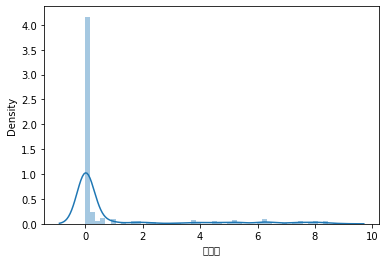

In [ ]:
sns.distplot(kyonggi1['강수량'])
kyonggi1['강수량']=np.log1p(kyonggi1['강수량'])
#정규성을 위배하여 로그 변환 시행

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  

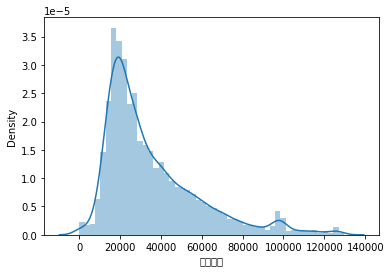

In [ ]:
sns.distplot(kyonggi1['품목금액'])

kyonggi1['품목금액']=np.log1p(kyonggi1['품목금액'])

#로그변환

In [ ]:
#문자형 피처 one hot encoding
#1.선형 기반-> one hot encoding
#라벨인코딩의 경우 ,선형회귀진행시 상관관계 있는 결과로 추출될 수 있다는 단점 o-> 원핫인코딩 시행

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


kyonggi1['주문시간']=encoder.fit_transform(kyonggi1['주문시간'])

gyeongnam1['주문시간']=encoder.fit_transform(gyeongnam1['주문시간'])

kyonggi1['요일']=encoder.fit_transform(kyonggi1['요일'])

gyeongnam1['품목코드']=encoder.fit_transform(gyeongnam1['품목코드'])

kyonggi1['품목코드']=encoder.fit_transform(kyonggi1['품목코드'])

gyeongnam1['품목코드']=encoder.fit_transform(gyeongnam1['품목코드'])

kyonggi1['수화인주소1,2']=encoder.fit_transform(kyonggi1['수화인주소1,2'])

gyeongnam1['수화인주소1,2']=encoder.fit_transform(gyeongnam1['수화인주소1,2'])

kyonggi1['isHoliday']=pd.get_dummies(kyonggi1['isHoliday'])
gyeongnam1['isHoliday']=pd.get_dummies(gyeongnam1['isHoliday'])
kyonggi1['isAnniversary']=pd.get_dummies(kyonggi1['isAnniversary'])
gyeongnam1['isAnniversary']=pd.get_dummies(gyeongnam1['isAnniversary'])
kyonggi1['isHoliday_yest']=pd.get_dummies(kyonggi1['isHoliday_yest'])
gyeongnam1['isHoliday_yest']=pd.get_dummies(gyeongnam1['isHoliday_yest'])



In [ ]:
#target feature: 물량
X=kyonggi1.drop(columns=['물량'])
Y=kyonggi1[['물량']]
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.linear_model import ARDRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=0)





In [ ]:
#전반적인 정규화 시행
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)

In [ ]:
#모델선택

#1
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
lr_reg_pred=lr_reg.predict(X_test)

#2
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
ridge_pred=ridge_reg.predict(X_test)

#3
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)
lasso_pred=lasso_reg.predict(X_test)
models=[lr_reg_pred, ridge_pred, lasso_pred]

#4
elasticnet_reg=ElasticNet()
elasticnet_reg.fit(X_train,y_train)
elasticnet_pred=elasticnet_reg.predict(X_test)





#5
randomforest_reg=RandomForestRegressor()
randomforest_reg.fit(X_train,y_train)
randomforest_pred=randomforest_reg.predict(X_test)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:


from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
xgb_params={'n_estimators':[1000]}
#6
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
#7
lgbm_reg=LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train,y_train)
lgbm_reg.fit(X_train_scale,y_train)
lgbm_reg.fit(X_train,y_train)

xgb_pred=xgb_reg.predict(X_test)
lgbm_pred_scale=lgbm_reg.predict(X_test_scale)
lgbm_pred=lgbm_reg.predict(X_test)
pred=0.5* xgb_pred + 0.5* lgbm_pred


models=[xgb_pred, lgbm_pred, pred]

[04:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

#오차계산 
from sklearn.metrics import mean_squared_error,  mean_squared_log_error,mean_absolute_error


def rmse(y,pred):
  return np.sqrt(mean_squared_error(y,pred))
def evaluate_regr(y,pred):
  
  rmse_val=rmse(y,pred)
  mae_val=mean_absolute_error(y,pred)
  print('RMSE:{0:.7f},MAE:{1:.7f}'.format(rmse_val, mae_val))

In [ ]:
for i in range(0,3):
  evaluate_regr(models[i],y_test)

#xgb, lgbm, xgb&lgbm

RMSE:0.3189912,MAE:0.1799901
RMSE:1.2695416,MAE:0.3266414
RMSE:0.7197895,MAE:0.2233052


In [ ]:
#pred
evaluate_regr(pred, y_test)
#xgb
evaluate_regr(xgb_pred, y_test)
#lbgm+ scaling
evaluate_regr(lgbm_pred_scale, y_test)
#lgbm
evaluate_regr(lgbm_pred, y_test)
#lasso
evaluate_regr(lasso_pred, y_test)

#ramdomforest
evaluate_regr(randomforest_pred, y_test)


RMSE:0.7197895,MAE:0.2233052
RMSE:0.3189912,MAE:0.1799901
RMSE:17.1504980,MAE:7.7374030
RMSE:1.2695416,MAE:0.3266414
RMSE:0.0674159,MAE:0.0358972
RMSE:0.2698023,MAE:0.0118341


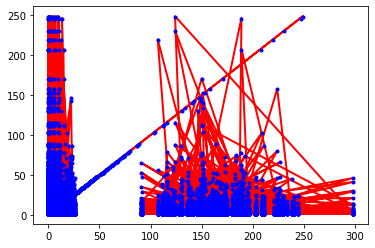

In [ ]:
# lasso 회귀 모델 채택(y_test 비교)
plt.plot(X_test, y_test,'r-',linewidth=2)
plt.plot(X_test, lasso_pred,'b.')

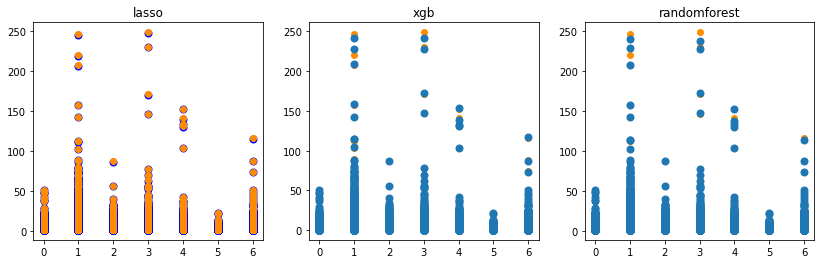

In [44]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(14,4),ncols=3)
ax1.set_title('lasso')
ax1.scatter(X_test['주문시간'],lasso_pred,linewidth=2,c='blue')
ax1.scatter(X_test['주문시간'], y_test,c='darkorange')


ax2.set_title('xgb')
ax2.scatter(X_test['주문시간'], y_test,c='darkorange')
ax2.scatter(X_test['주문시간'],xgb_pred,linewidth=2)

ax3.set_title('randomforest')
ax3.scatter(X_test['주문시간'], y_test,c='darkorange')
ax3.scatter(X_test['주문시간'],randomforest_pred,linewidth=2)